In [1]:
import shutil


In [2]:
shutil.make_archive('test', format='zip', root_dir='volumes')


'/mnt/28857F714F734EE8/quan_tran/distortion/Document-Dewarping-with-Control-Points/face_recognition/test.zip'

In [10]:
shutil.unpack_archive('test/test.zip', 'test/volumes')

In [13]:
shutil.unpack_archive("backup/01_11_2023_16_20_26_backup.zip", "volumes")

In [1]:
import os

In [2]:
os.rmdir("/mnt/28857F714F734EE8/quan_tran/distortion/Document-Dewarping-with-Control-Points/face_recognition/volumes")

OSError: [Errno 39] Directory not empty: '/mnt/28857F714F734EE8/quan_tran/distortion/Document-Dewarping-with-Control-Points/face_recognition/volumes'

In [3]:
import shutil

In [7]:
folder = "test/volumes"
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [11]:
shutil.move("/mnt/28857F714F734EE8/quan_tran/distortion/Document-Dewarping-with-Control-Points/face_recognition/test/volumes", "/mnt/28857F714F734EE8/quan_tran/distortion/Document-Dewarping-with-Control-Points/face_recognition/backup/test")

'/mnt/28857F714F734EE8/quan_tran/distortion/Document-Dewarping-with-Control-Points/face_recognition/backup/test'

In [12]:
from face_alignment import align
from face_alignment import mtcnn
from PIL import Image



In [27]:
def get_aligned_face(image_path, device):
    mtcnn_model = mtcnn.MTCNN(device=device, crop_size=(112, 112))
    img = Image.open(image_path).convert('RGB')
    # find face
    try:
        bboxes, faces = mtcnn_model.align_multi(img, limit=1)
        area = 0 
        best_face = None
        for face in faces:
            width, height = face.size
            if width*height > area:
                best_face = face
                area = width*height
    except Exception as e:
        best_face = None

    return best_face

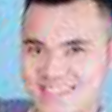

In [29]:
path_image = "data/test_images/people1/face1.jpg"

img = get_aligned_face(path_image, "cpu")
img


In [1]:
from datetime import datetime

In [8]:
date_str1 = '01_12_2023_21_44_06_backup'
date_str2 = '01_17_2023_07_30_28_backup'


In [9]:
date1 = datetime.strptime(date_str1, '%m_%d_%Y_%H_%M_%S_backup')
date2 = datetime.strptime(date_str2, '%m_%d_%Y_%H_%M_%S_backup')



In [19]:
def get_newest_database(root):
    for i, name in enumerate(os.listdir(root)):
        name = name[:-4]
        print(name)
        if i == 0:
            newest_time = datetime.strptime(name, '%m_%d_%Y_%H_%M_%S_backup')
        else:
            date = datetime.strptime(name, '%m_%d_%Y_%H_%M_%S_backup')
            if date > newest_time:
                newest_time = date
    return newest_time

In [21]:
get_newest_database("/mnt/28857F714F734EE8/quan_tran/distortion/Document-Dewarping-with-Control-Points/face_recognition/backup")

01_12_2023_21_44_06_backup
01_12_2023_21_44_44_backup
01_12_2023_21_45_16_backup
01_12_2023_21_53_03_backup
01_12_2023_21_53_57_backup
01_12_2023_21_57_01_backup
01_12_2023_21_57_54_backup
01_13_2023_08_16_03_backup
01_13_2023_08_16_46_backup
01_17_2023_07_27_40_backup
01_17_2023_07_28_39_backup
01_17_2023_07_30_28_backup


datetime.datetime(2023, 1, 17, 7, 30, 28)

In [1]:
import requests

In [2]:
url = 'http://192.168.192.243:5001/img/get_path_image'

In [3]:
params = {"table_name":"test1"}

In [7]:

response = requests.post(url, params=params)
"/data/test_images/people1/img5.jpg" in response.text

False

In [10]:
a = ["hai", "ba", "bon"]
"haiba" in a

False